In [1]:
from sklearn.metrics import f1_score

In [2]:
from src.fewshot_ner_viz_component.data_processing import *
from src.fewshot_ner_viz_component.utils import *
from src.fewshot_ner_viz_component.fewshot_ner_binary_classifier import *
from src.fewshot_ner_viz_component.ne_sim_visualizer import *

2018-08-28 14:35:50.910 INFO in 'summarizer.preprocessing.cleaner'['textcleaner'] at line 37: 'pattern' package not found; tag filters are not available for English
2018-08-28 14:35:50.939 DEBUG in 'matplotlib.backends'['__init__'] at line 90: backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
N_EXAMPLES = 10
N_TEST_SENTENCES = 10

In [4]:
dataset_orig = read_data()
ne_type = 'PERSON'
dataset = filter_dataset_by_ne_types(dataset_orig, ne_type)

Num of train sentences: 75187
Num of valid sentences: 9603
Num of test sentences: 9479
[(['Actions', 'had', 'to', 'be', 'taken', 'to', 'break', 'through', 'the', 'blockade', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'a', 'night', 'in', 'late', 'July', '1940', ',', 'the', 'atmosphere', 'in', 'Zhuanbi', 'Village', 'in', 'Shaanxi', 'was', 'unusual', '.'], ['O', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'B-GPE', 'I-GPE', 'O', 'B-GPE', 'O', 'O', 'O']), (['Villager', 'Xiao', 'Jianghe', 'has', 'a', 'vivid', 'memory', 'of', 'this', 'piece', 'of', 'history', '.'], ['O', 'B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'that', 'dark', 'night', ',', 'everyone', 'was', 'sleeping', 'when', 'human', 'voices', 'and', 'neighing', 'horses', 'were', 'heard', 'within', 'the', 'village', '.'], ['O', 'B-TIME', 'I-TIME', 'I-TIME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [5]:
embedder = CompositeEmbedder(use_elmo=True, elmo_scale=1, use_cap_feat=True, use_glove=True)

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


2018-08-28 14:35:54.109 INFO in 'tensorflow'['tf_logging'] at line 159: Using /tmp/tfhub_modules to cache modules.
2018-08-28 14:35:55.26 INFO in 'deeppavlov.models.embedders.glove_embedder'['glove_embedder'] at line 96: [loading embeddings from `/home/clement/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt`]
2018-08-28 14:35:55.27 INFO in 'gensim.models.utils_any2vec'['utils_any2vec'] at line 170: loading projection weights from /home/clement/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt
2018-08-28 14:35:55.27 DEBUG in 'smart_open.smart_open_lib'['smart_open_lib'] at line 176: {'kw': {}, 'mode': 'rb', 'uri': '/home/clement/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt'}
2018-08-28 14:36:18.26 INFO in 'gensim.models.utils_any2vec'['utils_any2vec'] at line 232: loaded (400000, 100) matrix from /home/clement/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:18.232 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


In [6]:
model = FewshotNerBinaryClassifier(embedder)

In [7]:
np.random.seed(33)
tokens_train,tags_train = get_data_sample(dataset['train'], N_EXAMPLES)
np.random.seed(33)
tokens_test,tags_test = get_data_sample(dataset['test'], min(N_TEST_SENTENCES, len(dataset['test'])))
y_test = tags2binaryFlat(tags_test)

In [9]:
markup_color = NeSimVisualizer.get_color(244,50,244)
pred_color = [NeSimVisualizer.get_color(255, 128, 0), NeSimVisualizer.get_color(0, 255, 0)]
viz_support = NeSimVisualizer(color=markup_color, height='650px', width='850px')
viz_pred = NeSimVisualizer(color=pred_color, height='650px', width='850px')

In [10]:
title1='Example sentences:'
title2='Results (token to NE similarities):'
f1_scores = []
for i in range(N_EXAMPLES):
    print('{} example sentences'.format(i+1))
    model.train_on_batch(tokens_train[i], tags_train[i])
    results = model(tokens_test)
    viz_support.display_ne_sim(tokens_train[:i+1], tags2binaryFlat(tags_train[:i+1]), transform=False, title='')
    viz_pred.display_ne_sim(tokens_test, results['probas'], transform=False, title='')
    f1 = f1_score(tags2binaryFlat(tags_test), results['pred'])
    print('F1 score: {:.2f}'.format(f1*100))
    f1_scores.append(f1)

1 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:19.441 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 5, # tokens: 24
n_samples: 24
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:20.352 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 71.70
2 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:21.474 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 7, # tokens: 42
n_samples: 42
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:22.225 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 80.00
3 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:23.551 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 8, # tokens: 54
n_samples: 54
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:24.658 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 88.89
4 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:26.230 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 11, # tokens: 71
n_samples: 71
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:27.217 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


Weighted kNN model
k = 1, metric: cosine
[====================] 100%


F1 score: 85.71
5 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:28.989 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 13, # tokens: 118
n_samples: 118
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:30.59 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 93.33
6 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:31.432 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 14, # tokens: 125
n_samples: 125
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:32.547 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 93.33
7 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:33.721 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 16, # tokens: 138
n_samples: 138
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:34.894 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 93.33
8 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:36.172 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 17, # tokens: 165
n_samples: 165
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:37.530 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 91.30
9 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:39.254 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 21, # tokens: 200
n_samples: 200
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:40.671 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 93.33
10 example sentences
Train
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:42.150 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


# ne: 22, # tokens: 219
n_samples: 219
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-08-28 14:36:43.668 INFO in 'tensorflow'['tf_logging'] at line 115: Saver not created because there are no variables in the graph to restore


SVM classifier model


F1 score: 93.33


2018-08-28 14:36:45.9 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1346: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/clement/virtenv/env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-08-28 14:36:45.37 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1346: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/clement/virtenv/env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


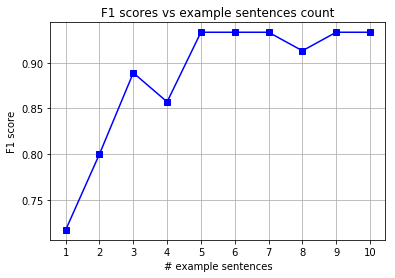

In [11]:
n_ex_sent_range = np.arange(1, N_EXAMPLES+1)
fig = plt.figure()
plt.plot(n_ex_sent_range, f1_scores, c='b', marker='s')
plt.xticks(n_ex_sent_range)
plt.xlabel('# example sentences')
plt.ylabel('F1 score')
plt.title('F1 scores vs example sentences count')
plt.grid()